In [3]:
import os

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from enum import Enum
from typing import List

In [4]:
"""
ローパスフィルタ
@param list データフレーム
@param window_size ウィンドウサイズ
@return フィルタ後のデータフレーム
"""

def low_filter(low_filter_list: pd.DataFrame, window_size: int) -> pd.DataFrame:

    for column in low_filter_list:
        if column == 'time':
            continue
        low_filter_list[column] = low_filter_list[column].rolling(window_size).mean()

    return low_filter_list

In [5]:
"""
グラフを作成する
@param list データフレーム
@param option オプション
@param axis 軸
@param filter_num フィルタ数
"""
def plot( plt_lists: List[pd.DataFrame],
         filter_num: int, color_list: [pd.DataFrame] = None) -> None:
    fig = plt.figure(figsize=(15, 25))
    fig.subplots_adjust(hspace=0.5)

    for index, list_val in enumerate(plt_lists):
        ax = fig.add_subplot(5, 1, index + 1)

        ax.plot(list_val['time'], list_val["bpm"], label="bpm")
        
        ax.legend()

        # 色付け
        if color_list is not None:
            if len(color_list[index].index) != 0:
                __color_paint(color_list[index], ax)

        # タイトル
        ax.set_title("bpm" + '_' + "window=" + str(filter_num))
        ax.set_xlabel('time [s]')

        # 単位の指定
        ax.set_ylabel('BPM [bpm]')

        ax.grid()

    plt.show()

In [6]:
"""
色付けを行う
@param list データフレーム データフレームは、start_time, end_time, colorの3つのカラムを持つ
@param ax matplotlibのax
"""
def __color_paint( color_list: pd.DataFrame, ax: plt.Axes) -> None:
    for index, color_list in color_list.iterrows():
        # 色付け
        # surprise = 赤
        # relief = 青
        
        color = None
        if color_list['color'] == 'surprise':
            color = 'red'
        elif color_list['color'] == 'relief':
            color = 'blue'
        else:
            color = 'green'
        ax.axvspan(color_list['start_time'], color_list['end_time'], color=color, alpha=0.5)

In [7]:
def classification(heart_rate_df_diff: pd.DataFrame) -> List:
    current_interval = None
    color_intervals = []  # ここで color_intervals を初期化

    
    for index, row in heart_rate_df_diff.iterrows():
        if current_interval is None:
            current_interval = [row['time'], None, row['status']]
        elif current_interval[2] != row['status']:
            current_interval[1] = row['time']
            color_intervals.append(current_interval)
            current_interval = [row['time'], None, row['status']]
    
    if current_interval is not None:
        current_interval[1] = heart_rate_df_diff['time'].iloc[-1]
        color_intervals.append(current_interval)
    
    return color_intervals

# グラフの読み込み

In [8]:
folder_name = "./data/21/"
df_north = pd.read_csv(os.path.join(folder_name,"north_bpm.csv"))
df_west = pd.read_csv(os.path.join(folder_name,"west_bpm.csv"))
df_south = pd.read_csv(os.path.join(folder_name,"south_bpm.csv"))
df_east = pd.read_csv(os.path.join(folder_name,"east_bpm.csv"))

df_list = [df_north, df_west, df_south, df_east]

df_emotion_north = pd.read_csv(os.path.join(folder_name,"north_emotion.csv"))
df_emotion_west = pd.read_csv(os.path.join(folder_name,"west_emotion.csv"))
df_emotion_south = pd.read_csv(os.path.join(folder_name,"south_emotion.csv"))
df_emotion_east = pd.read_csv(os.path.join(folder_name,"east_emotion.csv"))

df_emotion_list = [df_emotion_north, df_emotion_west, df_emotion_south, df_emotion_east]


# サンプリングレートの取得

In [9]:
for df in df_list:
    print(df["time"].diff().mean())

1.0132275132275133
1.0188679245283019
1.0350404312668464
2.459627329192547


# 微分を行う

In [10]:
df_diff_list = []

for df in df_list:
    heart_rate_df_diff = df.copy()
    heart_rate_df_diff["bpm"] = heart_rate_df_diff["bpm"].diff()
    heart_rate_df_diff["bpm"] = heart_rate_df_diff["bpm"].diff()

    # ソートする
    heart_rate_df_diff = heart_rate_df_diff.sort_values("time")
    heart_rate_df_diff = low_filter(heart_rate_df_diff, 10)
    heart_rate_df_diff
    df_diff_list.append(heart_rate_df_diff)

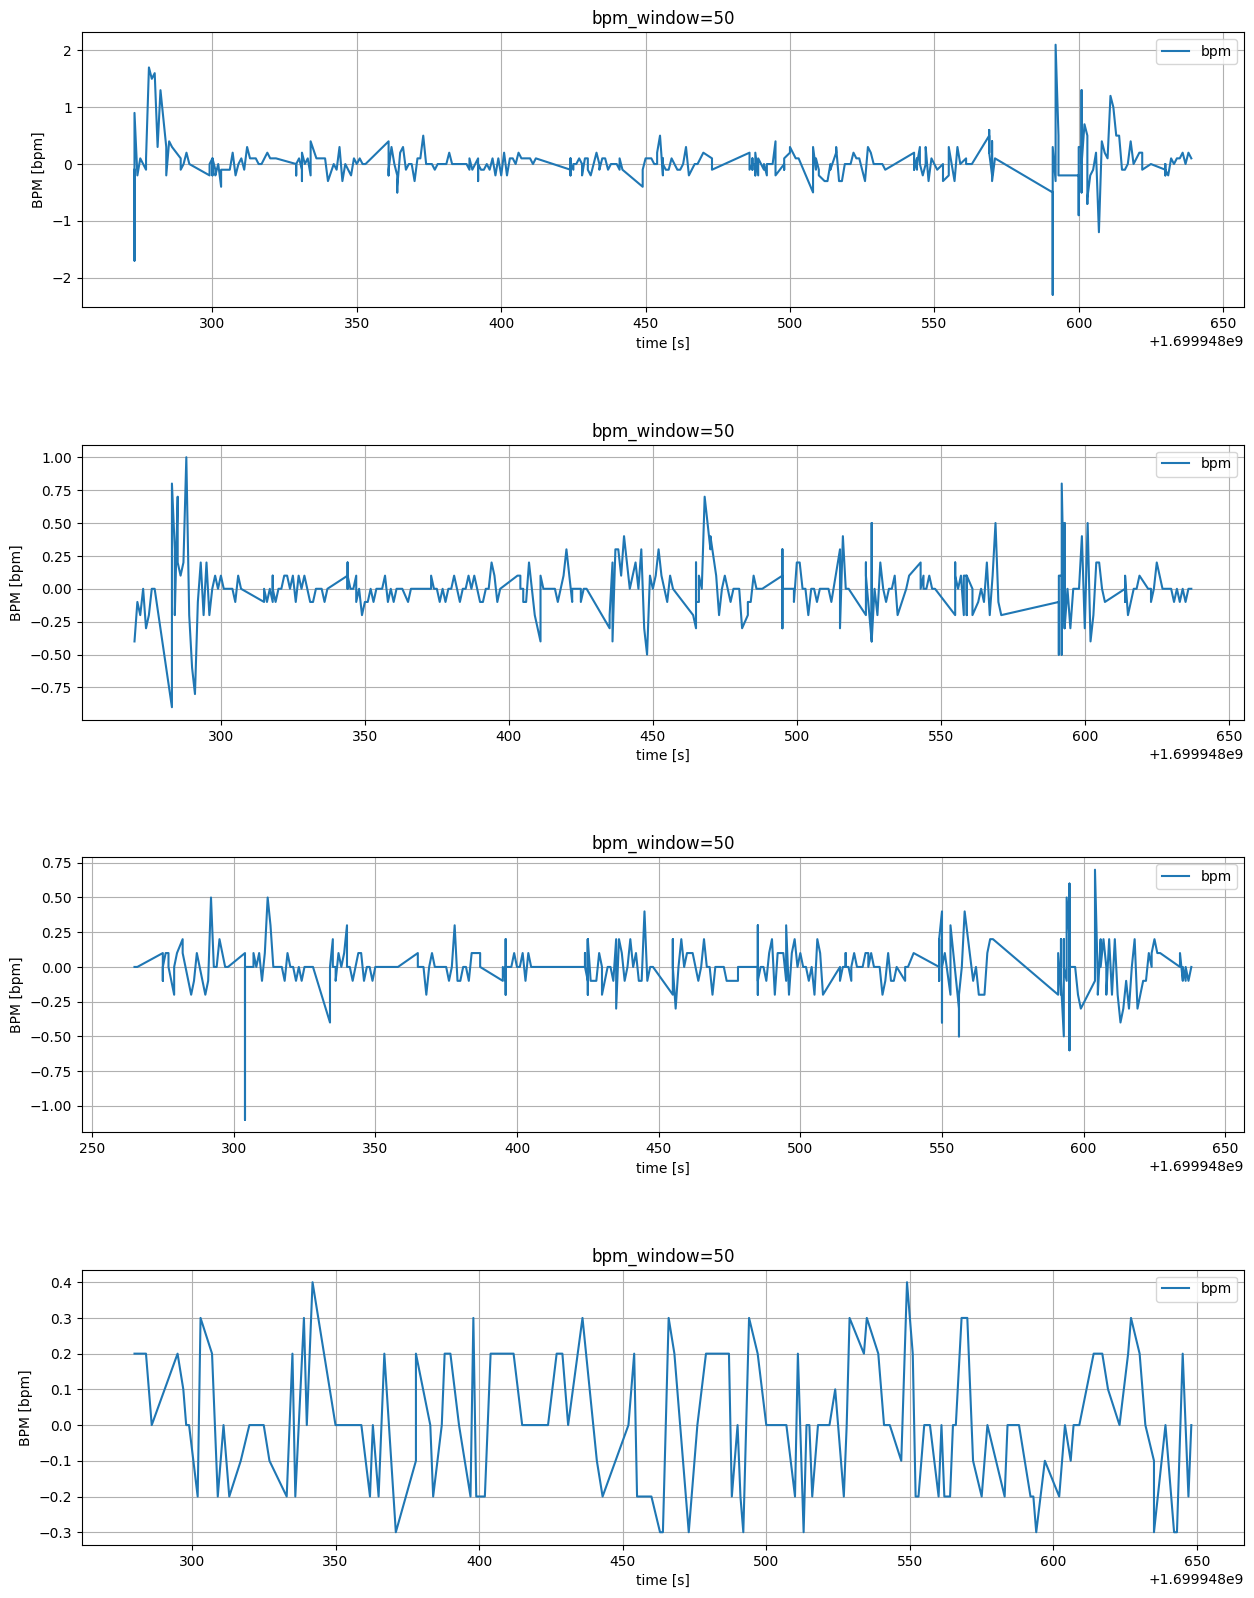

In [11]:
# df_diff_listをグラフ化する
plot(
    plt_lists=df_diff_list,
    filter_num=50,
)

[[1699948256, 1699948258, 'normal'], [1699948258, 1699948261, 'relief'], [1699948261, 1699948273, 'normal'], [1699948273, 1699948273, 'surprise'], [1699948273, 1699948273, 'relief'], [1699948273, 1699948273, 'normal'], [1699948273, 1699948273, 'surprise'], [1699948273, 1699948273, 'relief'], [1699948273, 1699948273, 'surprise'], [1699948273, 1699948273, 'relief'], [1699948273, 1699948274, 'surprise'], [1699948274, 1699948278, 'relief'], [1699948278, 1699948279, 'surprise'], [1699948279, 1699948280, 'normal'], [1699948280, 1699948281, 'relief'], [1699948281, 1699948289, 'normal'], [1699948289, 1699948289, 'surprise'], [1699948289, 1699948299, 'normal'], [1699948299, 1699948300, 'surprise'], [1699948300, 1699948300, 'relief'], [1699948300, 1699948300, 'surprise'], [1699948300, 1699948301, 'normal'], [1699948301, 1699948301, 'relief'], [1699948301, 1699948302, 'normal'], [1699948302, 1699948303, 'surprise'], [1699948303, 1699948304, 'relief'], [1699948304, 1699948309, 'normal'], [16999483

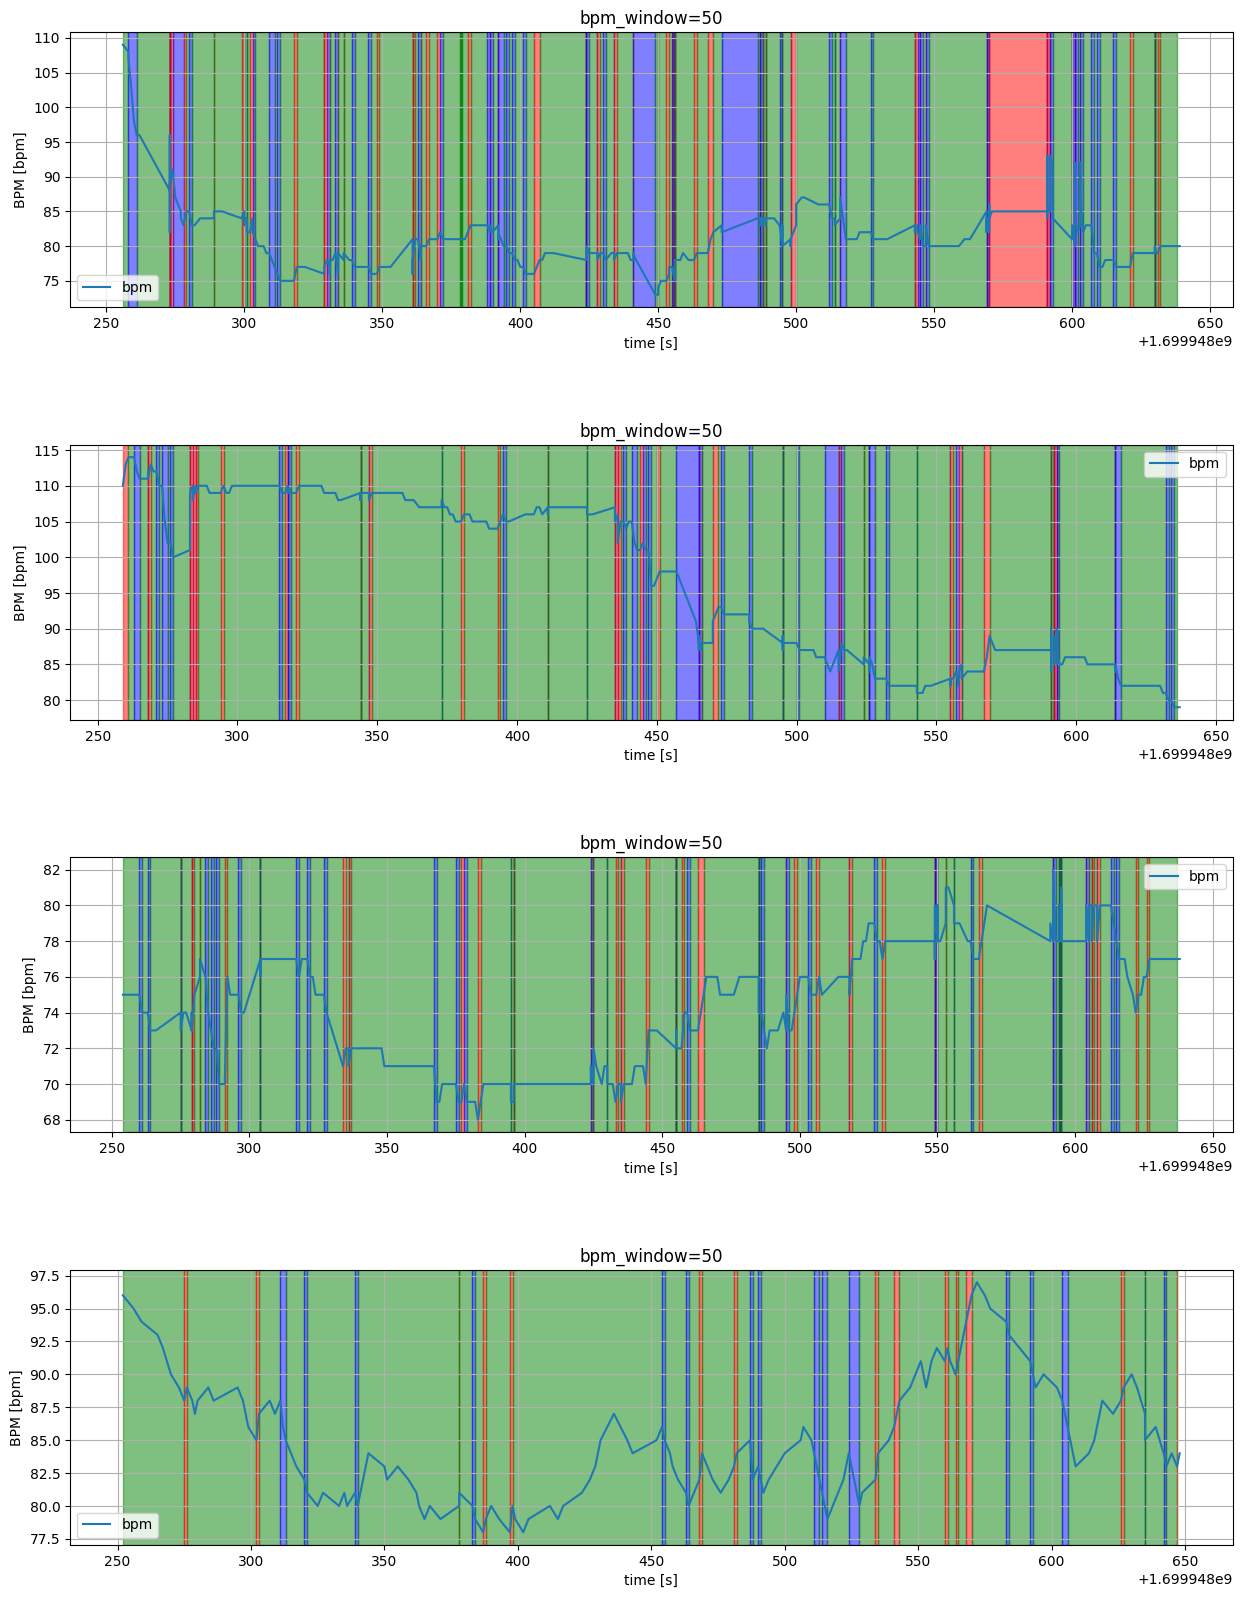

In [12]:


color_list = []

for df in df_emotion_list:
    color_intervals = classification(df)
    print(color_intervals)

    color_list.append(pd.DataFrame(
        data=color_intervals,
        columns=["start_time","end_time","color"]
    ))

plot(
    plt_lists=df_list,
    filter_num=50,
    color_list=color_list
)